## Шаг 1: Загрузка и анализ данных

### 1. Загрузка датасета Iris:

In [2]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris(as_frame=True)
df = iris.data
df['target'] = iris.target
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


### 2. Корреляции между признаками:

In [25]:
# Корреляции по всей таблице
correlation_matrix = df.iloc[:, :-2].corr()
print("Корреляции между признаками:\n", correlation_matrix)

# Корреляции для каждого класса
class_correlations = df.groupby('species').apply(lambda x: x.iloc[:, :-2].corr())
print("\nКорреляции между признаками для каждого класса:\n", class_correlations)


Корреляции между признаками:
                    sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  

Корреляции между признаками для каждого класса:
                               sepal length (cm)  sepal width (cm)  \
species                                                             
setosa     sepal length (cm)           1.000000          0.742547   
           sepal width (cm)            0.742547          1.000000   
           petal length (cm)           0.267176          0.177700   

C:\Users\snytk\AppData\Local\Temp\ipykernel_23748\1395666398.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  class_correlations = df.groupby('species').apply(lambda x: x.iloc[:, :-2].corr())


### 3. Визуализация распределений классов:

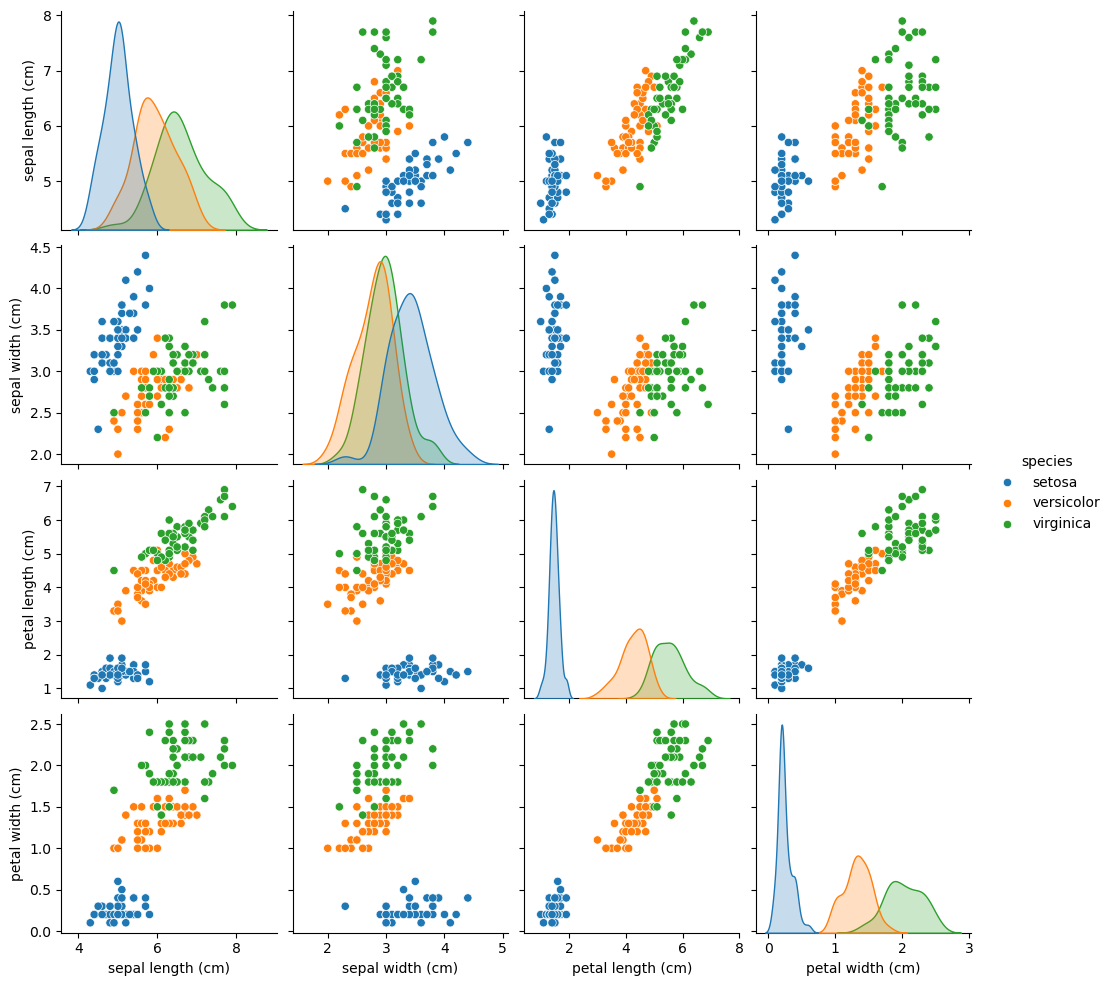

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

df_new = df.drop(columns='target')
sns.pairplot(df_new, hue='species')
plt.show()

## Шаг 2: Построение и визуализация разделяющих кривых

### 1. Выбор двух признаков и обучение классификаторов:

Тест
Точность линейного дискрименанта: 0.95
Balanced accuracy =  0.9529251700680272
Точность логистической регрессии: 0.95
Balanced accuracy =  0.9527891156462585
Точность квадратичного дискриминантного анализа: 0.95
Balanced accuracy =  0.9529251700680272
Точность линейного SVM: 0.96
Balanced accuracy =  0.959591836734694
Точность квадратичного SVM: 0.95
Balanced accuracy =  0.9527891156462585


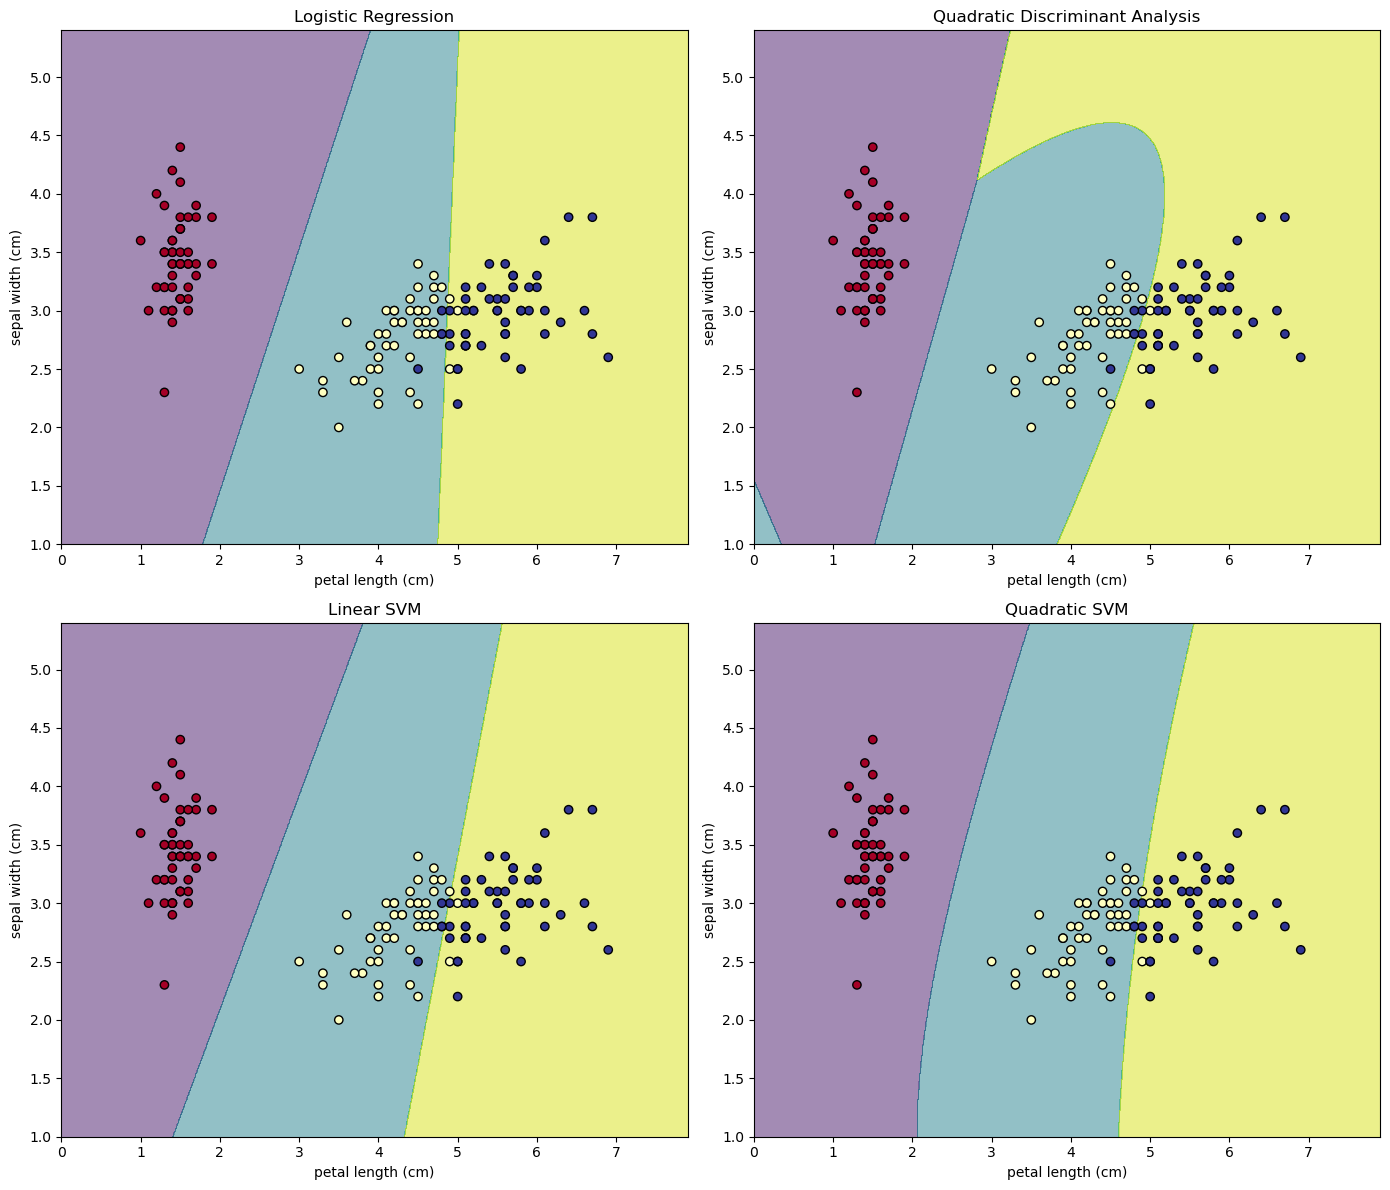

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay

# Выбираем два признака, например, 'petal length' и 'sepal width'
X = df[['petal length (cm)', 'sepal width (cm)']]
y = df['species']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

# Линейный дискрименант
lda = LinearDiscriminantAnalysis(solver='lsqr')
lda.fit(X_train, y_train)
accuracy_lda = accuracy_score(y_train, lda.predict(X_train))
balanced_acc_lda = balanced_accuracy_score(y_train, lda.predict(X_train))

# Логистическая регрессия
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
accuracy_log_reg = accuracy_score(y_train, log_reg.predict(X_train))
balanced_acc_log_reg = balanced_accuracy_score(y_train, log_reg.predict(X_train))

# Квадратичный дискриминантный анализ
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
accuracy_qda = accuracy_score(y_train, qda.predict(X_train))
balanced_acc_qda = balanced_accuracy_score(y_train, qda.predict(X_train))

# Линейное SVM
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
accuracy_svm_linear = accuracy_score(y_train, svm_linear.predict(X_train))
balanced_acc_svm_linear = balanced_accuracy_score(y_train, svm_linear.predict(X_train))

# Квадратичное SVM
svm_poly = SVC(kernel='poly', degree=2)
svm_poly.fit(X_train, y_train)
accuracy_svm_poly = accuracy_score(y_train, svm_poly.predict(X_train))
balanced_acc_svm_poly = balanced_accuracy_score(y_train, svm_poly.predict(X_train))

print("Тест")
print(f"Точность линейного дискрименанта: {accuracy_lda:.2f}")
print('Balanced accuracy = ', balanced_acc_lda)
print(f"Точность логистической регрессии: {accuracy_log_reg:.2f}")
print('Balanced accuracy = ', balanced_acc_log_reg)
print(f"Точность квадратичного дискриминантного анализа: {accuracy_qda:.2f}")
print('Balanced accuracy = ', balanced_acc_qda)
print(f"Точность линейного SVM: {accuracy_svm_linear:.2f}")
print('Balanced accuracy = ', balanced_acc_svm_linear)
print(f"Точность квадратичного SVM: {accuracy_svm_poly:.2f}")
print('Balanced accuracy = ', balanced_acc_svm_poly)



# # Линейный дискрименант
# lda = LinearDiscriminantAnalysis(solver='lsqr')
# lda.fit(X_train, y_train)
# y_pred_lda = lda.predict(X_test)
# accuracy_lda = accuracy_score(y_test, lda.predict(X_test))
# balanced_acc_lda = balanced_accuracy_score(y_test, lda.predict(X_test))

# # Логистическая регрессия
# log_reg = LogisticRegression()
# log_reg.fit(X_train, y_train)
# y_pred_log_reg = log_reg.predict(X_test)
# accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
# balanced_acc_log_reg = balanced_accuracy_score(y_test, y_pred_log_reg)

# # Квадратичный дискриминантный анализ
# qda = QuadraticDiscriminantAnalysis()
# qda.fit(X_train, y_train)
# y_pred_qda = qda.predict(X_test)
# accuracy_qda = accuracy_score(y_test, y_pred_qda)
# balanced_acc_qda = balanced_accuracy_score(y_test, y_pred_qda)

# # Линейное SVM
# svm_linear = SVC(kernel='linear')
# svm_linear.fit(X_train, y_train)
# y_pred_svm_linear = svm_linear.predict(X_test)
# accuracy_svm_linear = accuracy_score(y_test, y_pred_svm_linear)
# balanced_acc_svm_linear = balanced_accuracy_score(y_test, y_pred_svm_linear)

# # Квадратичное SVM
# svm_poly = SVC(kernel='poly', degree=2)
# svm_poly.fit(X_train, y_train)
# y_pred_svm_poly = svm_poly.predict(X_test)
# accuracy_svm_poly = accuracy_score(y_test, y_pred_svm_poly)
# balanced_acc_svm_poly = balanced_accuracy_score(y_test, y_pred_svm_poly)

# print("\nВалидация")
# print(f"Точность линейного дискрименанта: {accuracy_lda:.2f}")
# print('Balanced accuracy = ', balanced_acc_lda)
# print(f"Точность логистической регрессии: {accuracy_log_reg:.2f}")
# print('Balanced accuracy = ', balanced_acc_log_reg)
# print(f"Точность квадратичного дискриминантного анализа: {accuracy_qda:.2f}")
# print('Balanced accuracy = ', balanced_acc_qda)
# print(f"Точность линейного SVM: {accuracy_svm_linear:.2f}")
# print('Balanced accuracy = ', balanced_acc_svm_linear)
# print(f"Точность квадратичного SVM: {accuracy_svm_poly:.2f}")
# print('Balanced accuracy = ', balanced_acc_svm_poly)



# Визуализация границ решений
def plot_decision_boundary(clf, X, y, ax, title):
    DecisionBoundaryDisplay.from_estimator(clf, X, response_method="predict", ax=ax, alpha=0.5, grid_resolution=1000)
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolor='k', cmap=plt.cm.RdYlBu)
    ax.set_title(title)

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
data = {"setosa": 0, "virginica": 1, "versicolor": 2}
plot_decision_boundary(log_reg, X, df.target, axes[0, 0], "Logistic Regression")
plot_decision_boundary(qda, X, df.target, axes[0, 1], "Quadratic Discriminant Analysis")
plot_decision_boundary(svm_linear, X, df.target, axes[1, 0], "Linear SVM")
plot_decision_boundary(svm_poly, X, df.target, axes[1, 1], "Quadratic SVM")

plt.tight_layout()
plt.show()

## Шаг 3: Линейный дискриминантный анализ

### 1. Построение и визуализация линейного дискриминанта на всех объектах:

In [19]:
train = df.loc[df['species'] != 'setosa'].reset_index(drop=True)
train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,7.0,3.2,4.7,1.4,1,versicolor
1,6.4,3.2,4.5,1.5,1,versicolor
2,6.9,3.1,4.9,1.5,1,versicolor
3,5.5,2.3,4.0,1.3,1,versicolor
4,6.5,2.8,4.6,1.5,1,versicolor
...,...,...,...,...,...,...
95,6.7,3.0,5.2,2.3,2,virginica
96,6.3,2.5,5.0,1.9,2,virginica
97,6.5,3.0,5.2,2.0,2,virginica
98,6.2,3.4,5.4,2.3,2,virginica


C:\Users\snytk\AppData\Local\Temp\ipykernel_23748\3339029190.py:31: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X_pair.iloc[fp_mask, 0], X_pair.iloc[fp_mask, 1], c=color, label=f'FP {class1 if label == 0 else class2}', edgecolor='k', marker='x')
C:\Users\snytk\AppData\Local\Temp\ipykernel_23748\3339029190.py:31: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X_pair.iloc[fp_mask, 0], X_pair.iloc[fp_mask, 1], c=color, label=f'FP {class1 if label == 0 else class2}', edgecolor='k', marker='x')
C:\Users\snytk\AppData\Local\Temp\ipykernel_23748\3339029190.py:31: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in 

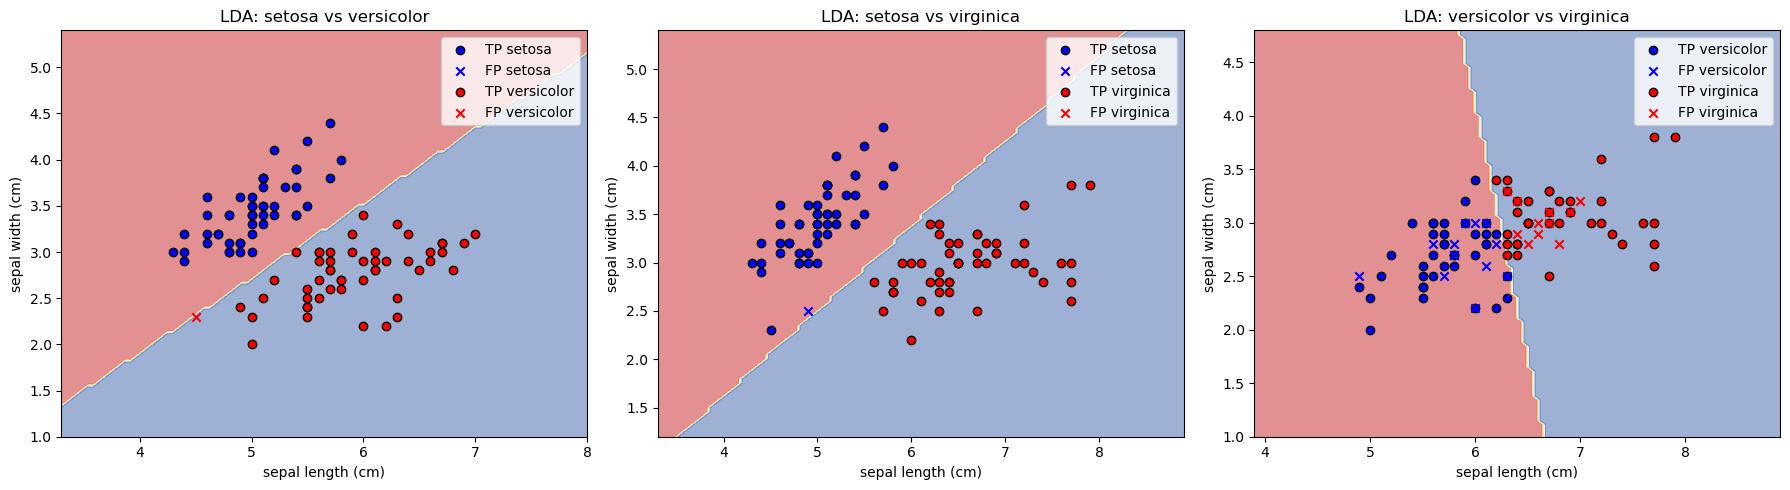

C:\Users\snytk\AppData\Local\Temp\ipykernel_23748\3339029190.py:31: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X_pair.iloc[fp_mask, 0], X_pair.iloc[fp_mask, 1], c=color, label=f'FP {class1 if label == 0 else class2}', edgecolor='k', marker='x')
C:\Users\snytk\AppData\Local\Temp\ipykernel_23748\3339029190.py:31: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X_pair.iloc[fp_mask, 0], X_pair.iloc[fp_mask, 1], c=color, label=f'FP {class1 if label == 0 else class2}', edgecolor='k', marker='x')
C:\Users\snytk\AppData\Local\Temp\ipykernel_23748\3339029190.py:31: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in 

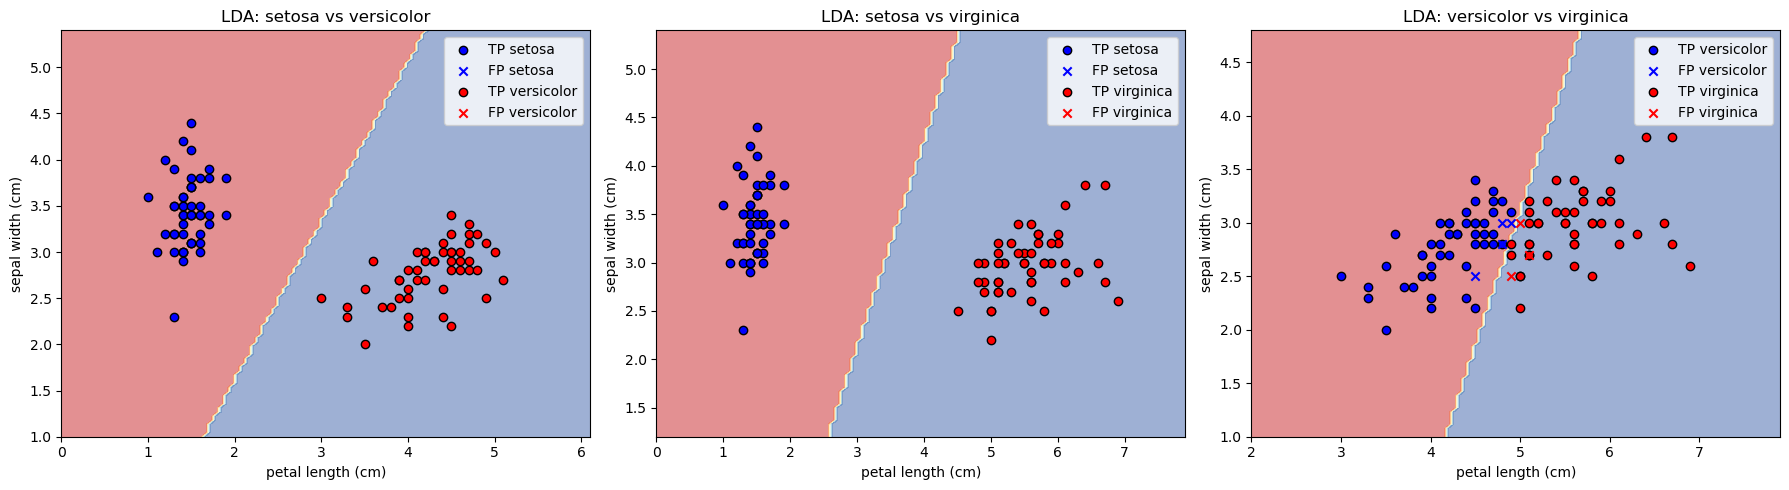

C:\Users\snytk\AppData\Local\Temp\ipykernel_23748\3339029190.py:31: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X_pair.iloc[fp_mask, 0], X_pair.iloc[fp_mask, 1], c=color, label=f'FP {class1 if label == 0 else class2}', edgecolor='k', marker='x')
C:\Users\snytk\AppData\Local\Temp\ipykernel_23748\3339029190.py:31: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X_pair.iloc[fp_mask, 0], X_pair.iloc[fp_mask, 1], c=color, label=f'FP {class1 if label == 0 else class2}', edgecolor='k', marker='x')
C:\Users\snytk\AppData\Local\Temp\ipykernel_23748\3339029190.py:31: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in 

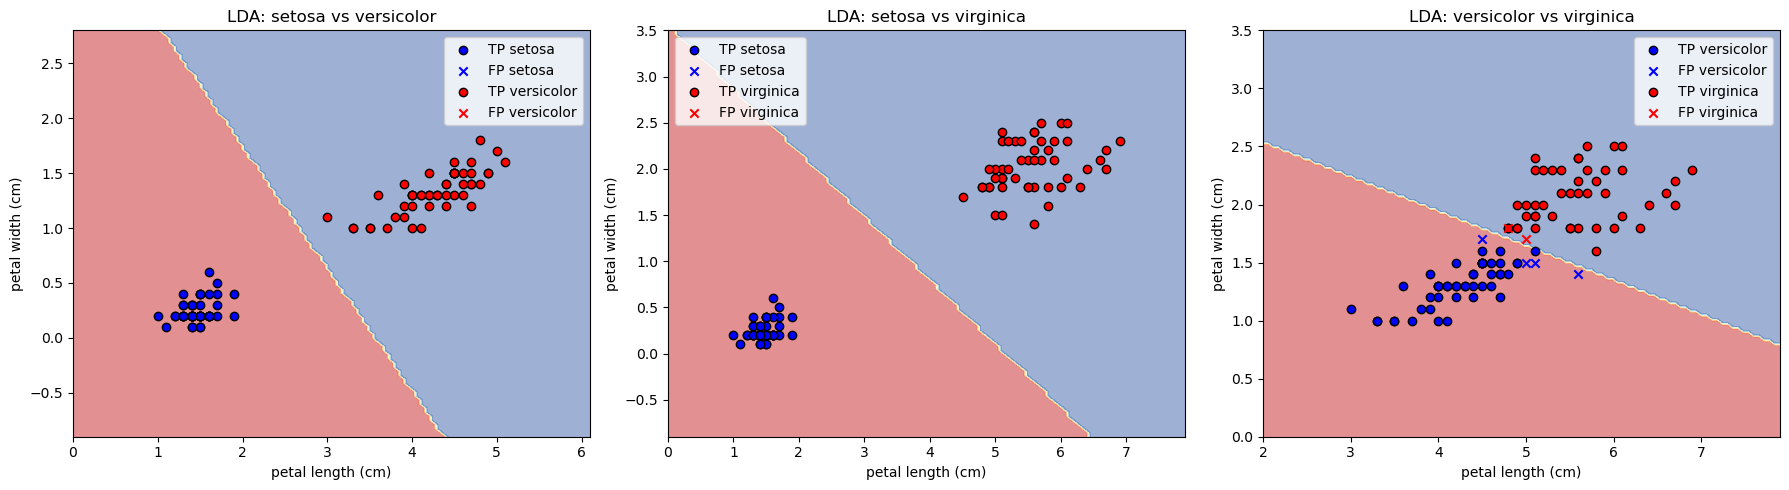

In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Функция для построения LDA и визуализации TP, FP
def plot_lda_for_pair(X, y, class1, class2, ax):
    # Отфильтровать данные для двух классов
    mask = (y == class1) | (y == class2)
    X_pair = X[mask]
    y_pair = y[mask]
    y_pair = np.where(y_pair == class1, 0, 1)  # Перекодируем метки классов в 0 и 1

    # Обучить LDA
    lda = LinearDiscriminantAnalysis(solver='lsqr')
    lda.fit(X_pair, y_pair)

    # Получить предсказания
    y_pred = lda.predict(X_pair)
    cm = confusion_matrix(y_pair, y_pred)

    # Визуализация границы решений
    DecisionBoundaryDisplay.from_estimator(lda, X_pair, response_method='predict', ax=ax, cmap=plt.cm.RdYlBu, alpha=0.5)
    
    # Визуализация данных с обозначением TP и FP
    for i, (label, color) in enumerate(zip([0, 1], ['blue', 'red'])):
        tp_mask = (y_pair == label) & (y_pred == label)
        fp_mask = (y_pair != label) & (y_pred == label)

        ax.scatter(X_pair.iloc[tp_mask, 0], X_pair.iloc[tp_mask, 1], c=color, label=f'TP {class1 if label == 0 else class2}', edgecolor='k', marker='o')
        ax.scatter(X_pair.iloc[fp_mask, 0], X_pair.iloc[fp_mask, 1], c=color, label=f'FP {class1 if label == 0 else class2}', edgecolor='k', marker='x')
    
    ax.set_title(f'LDA: {class1} vs {class2}')
    ax.legend()

# Выбираем два признака, например, 'sepal length (cm)' и 'sepal width (cm)'
X = df[['sepal length (cm)', 'sepal width (cm)']]
y = df['species']

# Все возможные пары классов
class_pairs = [('setosa', 'versicolor'), ('setosa', 'virginica'), ('versicolor', 'virginica')]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Построить LDA и визуализировать для каждой пары классов
for (class1, class2), ax in zip(class_pairs, axes):
    plot_lda_for_pair(X, y, class1, class2, ax)

plt.tight_layout()
plt.show();




# Выбираем два признака, например, 'petal length (cm)' и 'sepal width (cm)'
X = df[['petal length (cm)', 'sepal width (cm)']]
y = df['species']

# Все возможные пары классов
class_pairs = [('setosa', 'versicolor'), ('setosa', 'virginica'), ('versicolor', 'virginica')]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Построить LDA и визуализировать для каждой пары классов
for (class1, class2), ax in zip(class_pairs, axes):
    plot_lda_for_pair(X, y, class1, class2, ax)

plt.tight_layout()
plt.show()




# Выбираем два признака, например, 'petal length (cm)' и 'petal width (cm)'
X = df[['petal length (cm)', 'petal width (cm)']]
y = df['species']

# Все возможные пары классов
class_pairs = [('setosa', 'versicolor'), ('setosa', 'virginica'), ('versicolor', 'virginica')]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Построить LDA и визуализировать для каждой пары классов
for (class1, class2), ax in zip(class_pairs, axes):
    plot_lda_for_pair(X, y, class1, class2, ax)

plt.tight_layout()
plt.show();

## Шаг 4: Реализация квадратичной разделяющей функции

### Реализация квадратичной разделяющей функции:

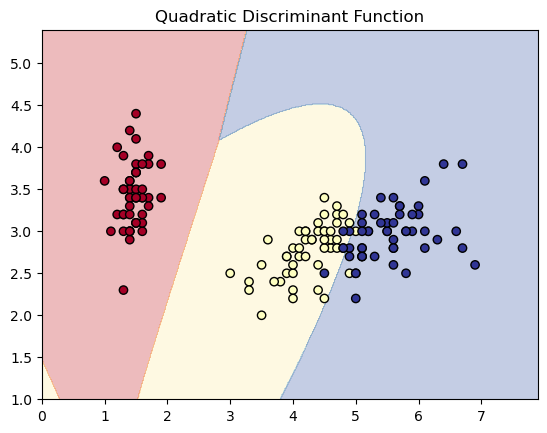

In [35]:
import numpy as np

X = df[['petal length (cm)', 'sepal width (cm)']]

def quadratic_discriminant(X, y):
    classes = np.unique(y)
    mean_vectors = []
    cov_matrices = []
    priors = []
    
    for cls in classes:
        X_cls = X[y == cls]
        mean_vectors.append(np.mean(X_cls, axis=0))
        cov_matrices.append(np.cov(X_cls, rowvar=False))
        priors.append(X_cls.shape[0] / X.shape[0])
    
    def discriminant_function(x):
        results = []
        for i, cls in enumerate(classes):
            mean_vec = mean_vectors[i]
            cov_matrix = cov_matrices[i]
            prior = priors[i]
            inv_cov_matrix = np.linalg.inv(cov_matrix)
            diff = x - mean_vec
            result = -0.5 * np.log(np.linalg.det(cov_matrix)) - 0.5 * diff.T @ inv_cov_matrix @ diff + np.log(prior)
            results.append(result)
        return np.argmax(results)
    
    return discriminant_function

# Реализация на двух переменных из пункта 2
def plot_quadratic_boundary(X, y, discriminant_func):
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
    Z = np.array([discriminant_func(np.array([x, y])) for x, y in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolor='k', cmap=plt.cm.RdYlBu)
    plt.title("Quadratic Discriminant Function")
    plt.show()

# Квадратичная разделяющая функция
qd_func = quadratic_discriminant(X, y)
plot_quadratic_boundary(X, df.target, qd_func)

### Шаг 1: Загрузка и анализ данных

1. **Корреляция признаков по всей таблице и по каждому классу:**
   - **Общие корреляции:** Признаки в наборе данных Iris показывают различные уровни корреляции между собой. Например, наиболее сильная корреляция наблюдается между длиной и шириной лепестков, что указывает на их зависимость и важность для классификации. 
   - **Корреляции внутри классов:** Для каждого класса (setosa, versicolor, virginica) корреляции отличаются. Например, в классе setosa корреляции могут быть менее выраженными, тогда как у versicolor и virginica более ярко выражены корреляции между длиной и шириной лепестков.
   
   **Вывод:** Визуализация корреляций и их различий для каждого класса помогает лучше понять структуру данных, что может влиять на выбор признаков для классификации.

---

### Шаг 2: Построение и визуализация разделяющих кривых

1. **Сравнение методов классификации (логистическая регрессия, линейный/квадратичный дискриминант, SVM):**
   - Линейные методы, такие как логистическая регрессия и линейное SVM, лучше справляются с более линейно разделимыми классами, такими как setosa, которая чётко отделена от остальных классов.
   - Квадратичные методы (QDA, SVM с квадратичным ядром) могут лучше справляться с классами, которые имеют более сложную структуру разделения (например, versicolor и virginica).
   - **Точность:** Линейные модели показывают хорошие результаты для более разделимых классов, в то время как квадратичные модели лучше справляются с классами, имеющими перекрытие.

   **Вывод:** Линейные методы хорошо работают с простыми разделимыми классами, однако для более сложных структур данных полезны квадратичные методы, которые учитывают нелинейность.

---

### Шаг 3: Линейный дискриминантный анализ (LDA)

1. **Построение линейного дискриминанта на всех объектах:**
   - Линейный дискриминантный анализ создаёт новую проекцию признаков, которая максимально разделяет классы. При визуализации видно, что LDA хорошо разделяет классы setosa от остальных, но между versicolor и virginica возникает некоторое перекрытие.
   - **Распределение классов в новом пространстве:** В проекции на одномерное пространство видно, что два класса (versicolor и virginica) имеют перекрытие, что затрудняет их классификацию.

   **Вывод:** LDA эффективно отделяет классы, которые имеют линейные границы, но при наличии перекрытия (как у versicolor и virginica) линейного разделения недостаточно.

---

### Шаг 4: Реализация квадратичной разделяющей функции

1. **Квадратичная разделяющая функция (собственная реализация):**
   - Квадратичная разделяющая функция, основанная на ковариационных матрицах и средних значениях для каждого класса, лучше учитывает сложные разделяющие кривые. 
   - При сравнении с другими методами квадратичная функция справляется с разделением классов versicolor и virginica лучше, чем линейные методы. Однако из-за схожести признаков этих классов, граница может быть не такой точной.
   - **Визуализация разделяющей функции:** Разделение между классами более гибкое, что позволяет учитывать нелинейность в данных, в отличие от линейных методов.

   **Вывод:** Квадратичная разделяющая функция более точна для разделения сложных классов (например, versicolor и virginica), так как учитывает ковариации внутри каждого класса. Она демонстрирует лучшие результаты, чем линейные методы, при работе с нелинейными структурами данных.

---

### Общий вывод:

- **Линейные методы** (логистическая регрессия, линейный дискриминант, линейное SVM) справляются хорошо с задачами, где классы линейно разделимы (например, setosa). Однако для классов с более сложной структурой разделения (versicolor и virginica) они показывают посредственные результаты.
- **Квадратичные методы** (QDA, SVM с квадратичным ядром, квадратичная разделяющая функция) лучше подходят для случаев, когда классы имеют нелинейные разделяющие границы. Особенно это актуально для сложных классов с перекрывающимися признаками.
- **Выбор метода** следует осуществлять, исходя из сложности данных и структуры классов: для простых линейно разделимых классов достаточно линейных методов, для более сложных классов лучше использовать квадратичные методы.